In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###1. Load data

In [3]:
# load data
df=pd.read_csv('/content/ks-projects-201612 2.csv', encoding='latin1')
df.head()

<ipython-input-3-5faaa4981748>:2: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/ks-projects-201612 2.csv', encoding='latin1')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


### 2. Clean data

In [4]:
# explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16     1 non-null       float64
dtypes: float64

In [5]:
# drop columns that are empty
df.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [6]:
df.describe()

,ID
count,3.237500e+05
mean,1.074943e+09
std,6.193352e+08
min,5.971000e+03
25%,5.375802e+08
50%,1.075818e+09
75%,1.611070e+09
max,2.147476e+09


In [7]:
df.dtypes

ID                 int64
name              object
category          object
main_category     object
currency          object
deadline          object
goal              object
launched          object
pledged           object
state             object
backers           object
country           object
usd pledged       object
dtype: object

In [8]:
# Check for missing values
df.isna().sum()

ID                   0
name                 4
category             5
main_category        0
currency             0
deadline             0
goal                 0
launched             0
pledged              0
state                0
backers              0
country              0
usd pledged       3790
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

ID                0
name              0
category          0
main_category     0
currency          0
deadline          0
goal              0
launched          0
pledged           0
state             0
backers           0
country           0
usd pledged       0
dtype: int64

### 3. which category is the most popular category

In [11]:
#check the number of projects in each category?

main_category_counts = df['main_category '].value_counts()
main_category_counts

Film & Video           56793
Music                  44360
Publishing             33738
Games                  28002
Technology             26121
                       ...  
 Kingdom of Heaven.        1
Musical                    1
Flight                     1
 pants                     1
Kids                       1
Name: main_category , Length: 119, dtype: int64

In [12]:
#top5 most popular categories
top_5_main_categories=main_category_counts.nlargest(5)
top_5_main_categories

Film & Video    56793
Music           44360
Publishing      33738
Games           28002
Technology      26121
Name: main_category , dtype: int64

Text(0, 0.5, 'Count')

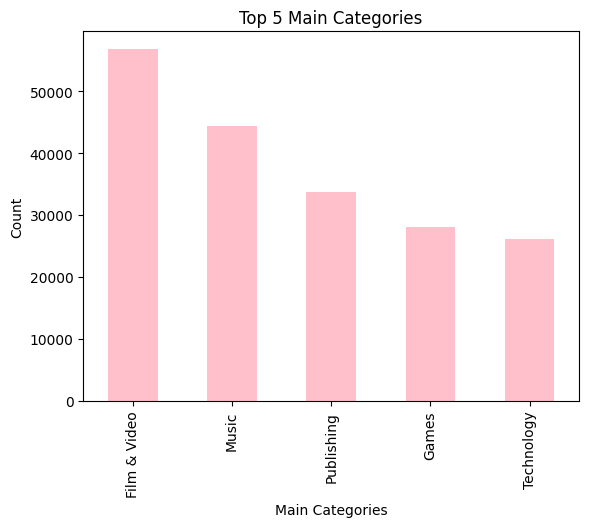

In [13]:
#make bar chart with top 5 categories
top_5_main_categories.plot(kind='bar', color='pink')
plt.title('Top 5 Main Categories')
plt.xlabel('Main Categories')
plt.ylabel('Count')

### 4. How has the dominance of primary categories evolved over the years?

In [14]:
#ignore the wrong number and add the 'year' column
df['launched '] = pd.to_datetime(df['launched '], errors='coerce')
df['year'] = df['launched '].dt.year
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,2015.0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,2013.0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,2012.0
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,2015.0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,2016.0


In [15]:
#take the year between 2009 and 2023
valid_years_mask = (df['year'] >= 2009) & (df['year'] <= 2015)
df_filtered = df[valid_years_mask]

# Group by 'year' and 'main_category' and count the occurrences of each main category in each year
category_counts = df_filtered.groupby(['year', 'main_category '])['main_category '].count()

# Get the top 5 popular main categories for each year
top_5_by_year = category_counts.groupby('year').nlargest(5).reset_index(level=0, drop=True)

top_5_by_year

year    main_category 
2009.0  Film & Video       325
        Music              295
        Art                169
        Publishing         129
        Photography         73
2010.0  Film & Video      3676
        Music             2460
        Art                853
        Publishing         701
        Theater            607
2011.0  Film & Video      7990
        Music             6606
        Art               2333
        Publishing        2243
        Theater           1468
2012.0  Film & Video      9389
        Music             8843
        Publishing        5332
        Art               3422
        Games             2779
2013.0  Film & Video      9521
        Music             6876
        Publishing        5778
        Games             4084
        Art               3426
2014.0  Film & Video      9683
        Publishing        7188
        Music             7047
        Food              6450
        Technology        6437
2015.0  Technology        9696
        Film & V

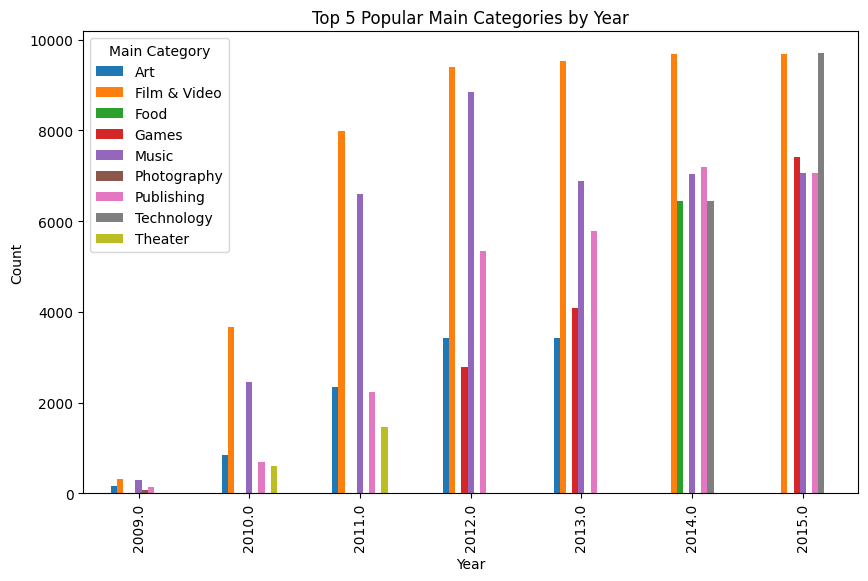

In [16]:
# Plot bar chart for each year
top_5_by_year.unstack().plot(kind='bar', figsize=(10, 6))

# Set plot title and labels
plt.title('Top 5 Popular Main Categories by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Main Category')

### 5. What are the top 5 most prevalent categories for each country?

In [17]:
# to check how many countries are involed in this table
df['country '].nunique()

161

In [19]:
#top 5 countries with the biggest dataset
top5_country_big_data=df['country '].value_counts().nlargest(5)
top5_country_big_data

US    257562
GB     27508
CA     11992
AU      6236
DE      2684
Name: country , dtype: int64

In [20]:
#select dataset only in these 5 countries
top_countries = ['US', 'GB', 'CA', 'AU', 'DE']
df_top_countries = df[df['country '].isin(top_countries)]
df_top_countries


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,2015.0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,2013.0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,2012.0
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,2015.0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,2014.0
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,2011.0
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,2010.0
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,2016.0


In [21]:
# Group by 'country' and 'category' and count the occurrences of each category in each country
category_counts_by_country = df_top_countries.groupby(['country ', 'category ']).size()
category_counts_by_country

country   category   
AU        3D Printing      16
          Academic         16
          Accessories      94
          Action           14
          Animals          11
                         ... 
US        Woodworking     758
          Workshops        99
          World Music    1614
          Young Adult     501
          Zines           167
Length: 775, dtype: int64

In [22]:
# Get the top 5 popular categories for each country
top_5_by_country = category_counts_by_country.groupby('country ').nlargest(5).reset_index(level=0, drop=True)

top_5_by_country

country   category      
AU        Product Design      490
          Video Games         275
          Apps                235
          Web                 211
          Apparel             198
CA        Product Design      872
          Video Games         666
          Documentary         436
          Tabletop Games      408
          Technology          364
DE        Product Design      239
          Video Games         175
          Technology          124
          Apps                 95
          Web                  81
GB        Product Design     1417
          Video Games        1316
          Shorts             1235
          Tabletop Games     1083
          Documentary         998
US        Product Design    13409
          Documentary       12864
          Music             10288
          Shorts            10009
          Food               9013
dtype: int64

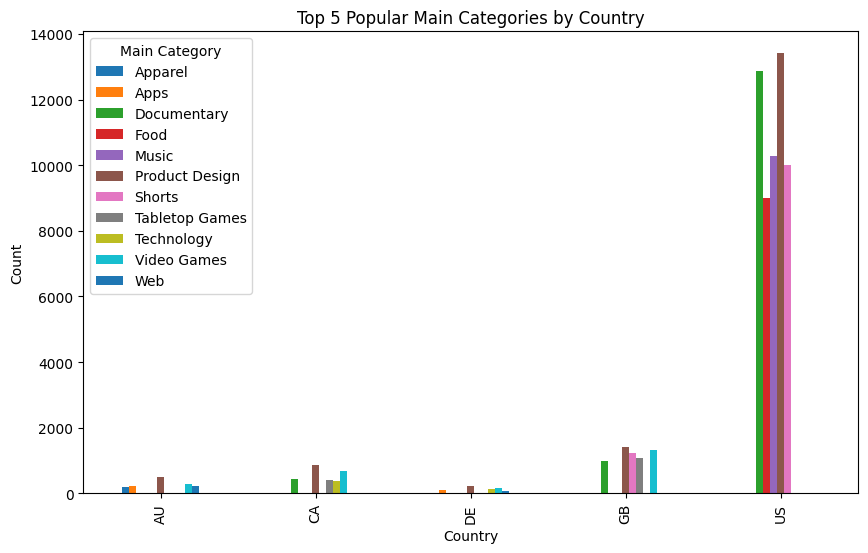

In [23]:
# Plot bar chart for each country
top_5_by_country.unstack().plot(kind='bar', figsize=(10, 6))

# Set plot title and labels
plt.title('Top 5 Popular Main Categories by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Main Category')

### 6. check the rate of pledged funds state within each category

In [24]:
# check top 5 categories with biggest dataset
top5_category_big_data=df['main_category '].value_counts().nlargest(5)
top5_category_big_data

Film & Video    56793
Music           44360
Publishing      33738
Games           28002
Technology      26121
Name: main_category , dtype: int64

In [25]:
#select dataset only in these 5 main categories
top_main_category = ['Film & Video', 'Music', 'Publishing', 'Games', 'Technology']
top_main_category = df[df['main_category '].isin(top_main_category)]
top_main_category

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,2015.0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,2013.0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,2012.0
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,2015.0
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323744,999976312,Angela's Poetry (Canceled),Poetry,Publishing,CAD,2014-09-20 03:46:07,5500,2014-08-06 03:46:07,0,canceled,0,CA,0,2014.0
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,2014.0
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,2011.0
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,2010.0


In [26]:
#check the number of different types of state
state_list=df['state '].nunique()
state_list

407

In [30]:
#top 3 state with the biggest dataset
top3_state_big_data=df['state '].value_counts().nlargest(3)
top3_state_big_data

failed        168113
successful    112976
canceled       32332
Name: state , dtype: int64

In [31]:
# select data with these top 3 state
top_state = ['failed', 'successful', 'canceled']
df_top_state = df[df['state '].isin(top_state)]
df_top_state

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,2015.0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,2013.0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,2012.0
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,2015.0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,2014.0
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,2011.0
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,2010.0
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,2016.0


In [32]:
# Group by 'main_category ' and 'state ' and count the occurrences of each category in each country
category_state = df_top_state.groupby(['state ', 'main_category ']).size()
category_state

state       main_category 
canceled    Art                1885
            Comics              702
            Crafts              682
            Dance               137
            Design             3119
            Fashion            2128
            Film & Video       5151
            Food               1931
            Games              4964
            Journalism          435
            Music              2934
            Photography         884
            Publishing         3084
            Technology         3749
            Theater             547
failed      Art               12091
            Comics             3406
            Crafts             4630
            Dance              1089
            Design            12039
            Fashion           11499
            Film & Video      29640
            Food              13602
            Games             13012
            Journalism         2656
            Music             19137
            Photography        5743
 

In [33]:
# Calculate the total count of projects in each state
total_projects_by_state = category_state.groupby('state ').sum()

# Calculate the ratio of each category in each state
category_state_ratio = category_state.div(total_projects_by_state) * 100

category_state_ratio

state       main_category 
canceled    Art                5.830137
            Comics             2.171224
            Crafts             2.109365
            Dance              0.423729
            Design             9.646790
            Fashion            6.581715
            Film & Video      15.931585
            Food               5.972411
            Games             15.353210
            Journalism         1.345416
            Music              9.074601
            Photography        2.734133
            Publishing         9.538538
            Technology        11.595324
            Theater            1.691822
failed      Art                7.192186
            Comics             2.026018
            Crafts             2.754100
            Dance              0.647779
            Design             7.161255
            Fashion            6.840042
            Film & Video      17.630998
            Food               8.090986
            Games              7.740032
            J

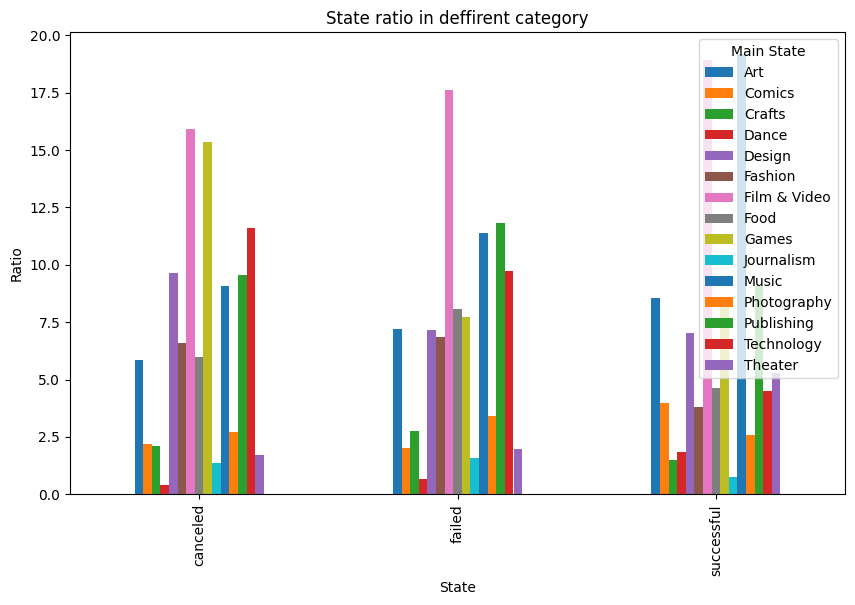

In [35]:
# Plot bar chart for each country
category_state_ratio.unstack().plot(kind='bar', figsize=(10, 6))

# Set plot title and labels
plt.title('State ratio in deffirent category')
plt.xlabel('State')
plt.ylabel('Ratio')
plt.legend(title='Main State')

### 7. which category (among top5) has highest goal

In [36]:
#most popular cateogies in the dataset (obtained before)
top_5_main_categories

Film & Video    56793
Music           44360
Publishing      33738
Games           28002
Technology      26121
Name: main_category , dtype: int64

In [37]:
#change obj to number
df['goal '] = pd.to_numeric(df['goal '], errors='coerce')


In [38]:
#select data within top 5 cateogries

top_categories = ['Film & Video', 'Music', 'Publishing', 'Games', 'Technology']
df_top_categories = df[df['main_category '].isin(top_categories)]
df_top_categories

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0,failed,0,GB,0,2015.0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220,failed,3,US,220,2013.0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1,failed,1,US,1,2012.0
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283,canceled,14,US,1283,2015.0
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323744,999976312,Angela's Poetry (Canceled),Poetry,Publishing,CAD,2014-09-20 03:46:07,5500.0,2014-08-06 03:46:07,0,canceled,0,CA,0,2014.0
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000.0,2014-09-17 02:35:30,25,canceled,1,US,25,2014.0
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500.0,2011-06-22 03:35:14,155,failed,5,US,155,2011.0
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000.0,2010-07-01 19:40:30,20,failed,1,US,20,2010.0


In [39]:
# top5_category_avg_goal=df_top_categories.groupby('main_category ')['goal '].mean()
# top5_category_avg_goal

average_goal_by_category = df_top_categories.groupby('main_category ')['goal '].mean()

average_goal_by_category

main_category 
Film & Video     74058.683258
Games            55629.084439
Music            15908.005537
Publishing       31038.615459
Technology      116244.874534
Name: goal , dtype: float64

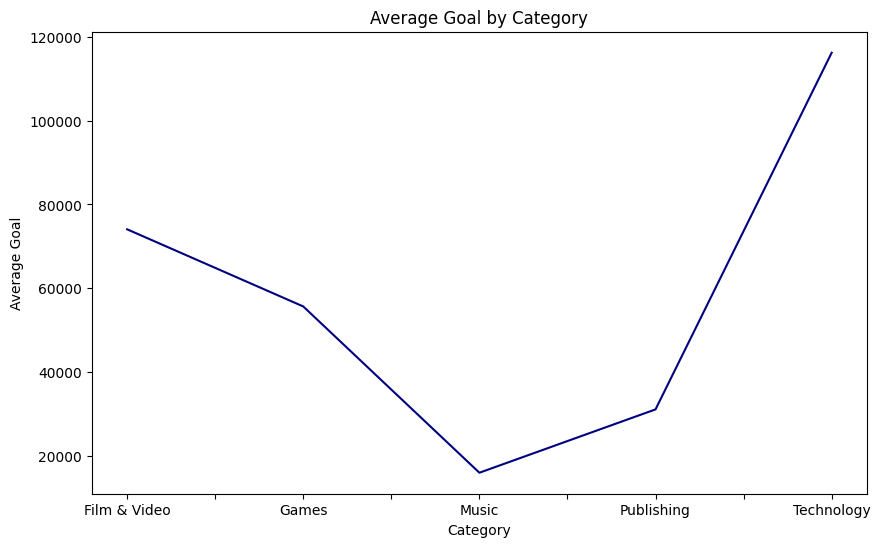

In [40]:
# Plot line chart
plt.figure(figsize=(10, 6))
average_goal_by_category.plot(kind='line', color='navy')
plt.title('Average Goal by Category')
plt.xlabel('Category')
plt.ylabel('Average Goal')
plt.show()

### 8. Identify the main category that received the highest amount of USD pledges

In [41]:
#change obj to number
df['usd pledged '] = pd.to_numeric(df['usd pledged '], errors='coerce')

In [42]:
sum_usd_pledged=df.groupby('main_category ')['usd pledged '].sum()
sum_usd_pledged_top5=sum_usd_pledged.nlargest(5)
sum_usd_pledged_top5

main_category 
Games           5.322062e+08
Design          4.805913e+08
Technology      4.765929e+08
Film & Video    3.417390e+08
Music           1.626228e+08
Name: usd pledged , dtype: float64

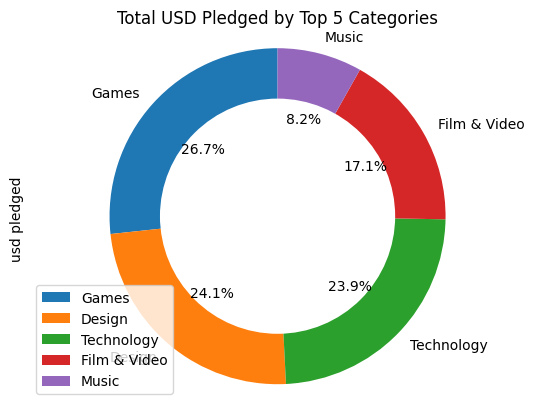

In [43]:
# Create donut pie chart
sum_usd_pledged_top5.plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Total USD Pledged by Top 5 Categories')
plt.axis('equal')
plt.legend(labels=sum_usd_pledged_top5.index)
plt.show()

### 9. Examine the fluctuation in pledge amounts for each category over time

In [45]:
#take the year between 2009 and 2015
valid_years_mask = (df['year'] >= 2009) & (df['year'] <= 2015)
df_filtered = df[valid_years_mask]

# Group by 'year' and 'main_category' and count the sum of usd pledgement
category_year_usd_pledged = df_filtered.groupby(['year', 'main_category '])['usd pledged '].sum()
category_year_usd_pledged


year    main_category 
2009.0  Art               3.859333e+05
        Comics            8.474733e+04
        Crafts            1.446500e+04
        Dance             2.177849e+04
        Design            5.360822e+04
                              ...     
2015.0  Music             2.452565e+07
        Photography       7.031329e+06
        Publishing        2.217015e+07
        Technology        1.661051e+08
        Theater           6.125977e+06
Name: usd pledged , Length: 109, dtype: float64

Text(0, 0.5, 'USD Pledges')

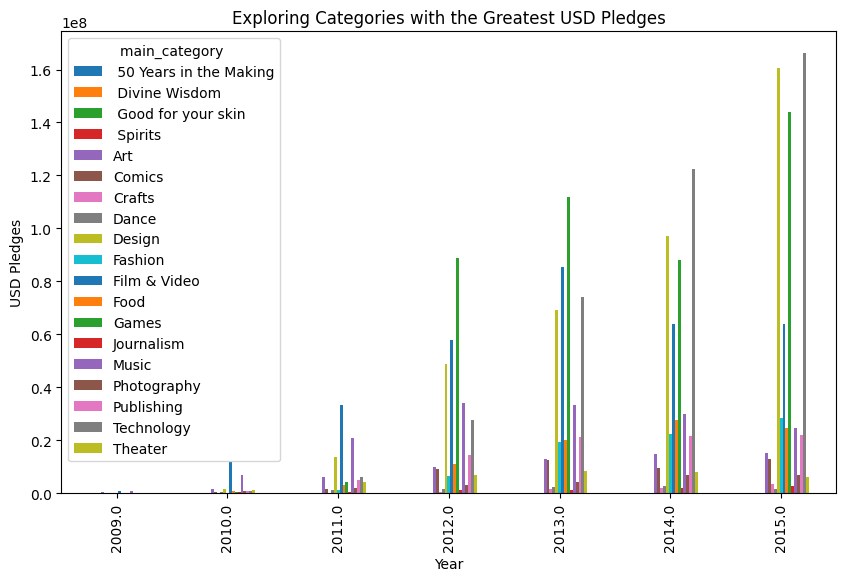

In [46]:
# Plot bar chart for each country
category_year_usd_pledged.unstack().plot(kind='bar', figsize=(10, 6))

# Set plot title and labels
plt.title('Exploring Categories with the Greatest USD Pledges')
plt.xlabel('Year')
plt.ylabel('USD Pledges')


### 10. Identifying the Category with the Most Significant Increase in USD Pledges from 2010 to 2015

In [47]:
category_year_usd_pledged

year    main_category 
2009.0  Art               3.859333e+05
        Comics            8.474733e+04
        Crafts            1.446500e+04
        Dance             2.177849e+04
        Design            5.360822e+04
                              ...     
2015.0  Music             2.452565e+07
        Photography       7.031329e+06
        Publishing        2.217015e+07
        Technology        1.661051e+08
        Theater           6.125977e+06
Name: usd pledged , Length: 109, dtype: float64

In [48]:
# Extract USD pledges for 2010 and 2015
usd_pledges_2010 = category_year_usd_pledged.loc[2010]
usd_pledges_2015 = category_year_usd_pledged.loc[2015]
usd_pledges_2010


main_category 
Art              1577131.14
Comics            534928.13
Crafts             89145.96
Dance             348587.41
Design           1729584.32
Fashion           249351.03
Film & Video    11766191.13
Food              940684.20
Games             544481.17
Journalism        330472.98
Music            6998472.66
Photography       965331.98
Publishing       1062959.14
Technology        856166.79
Theater          1416436.67
Name: usd pledged , dtype: float64

In [49]:
# Calculate the increase in USD pledges from 2010 to 2015 for each category
increase_in_usd_pledges = ((usd_pledges_2015 - usd_pledges_2010)/usd_pledges_2010)*100

increase_in_usd_pledges_sorted=increase_in_usd_pledges.sort_values(ascending=False)
increase_in_usd_pledges_sorted

main_category 
Games                  26323.956022
Technology             19301.022962
Fashion                11272.693444
Design                  9184.578095
Crafts                  3654.504471
Food                    2537.586910
Comics                  2341.899893
Publishing              1985.700792
Art                      859.802657
Journalism               755.668281
Photography              628.384581
Film & Video             442.470038
Dance                    395.685777
Theater                  332.492123
Music                    250.442927
 Divine Wisdom                  NaN
 Good for your skin             NaN
Name: usd pledged , dtype: float64

Text(0, 0.5, 'improvement')

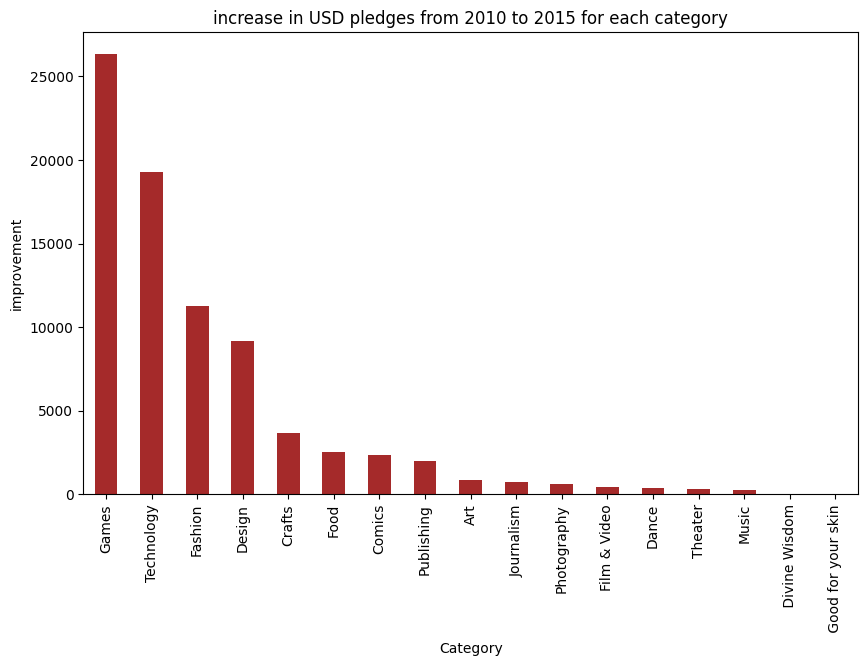

In [50]:
# Plot line chart
plt.figure(figsize=(10, 6))
increase_in_usd_pledges_sorted.plot(kind='bar', color='brown')
plt.title('increase in USD pledges from 2010 to 2015 for each category')
plt.xlabel('Category')
plt.ylabel('improvement')
